In [3]:
import torch

torch.__version__

'2.0.1'

In [6]:
import os
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

import json
from PIL import Image, ImageDraw


In [7]:
def load_coco_data(image_dir, annotation_file):
    # JSON 파일 로딩
    with open(annotation_file) as f:
        annotations = json.load(f)
    
    images = annotations['images']
    annotations = annotations['annotations']
    
    # 이미지 ID를 key로 하고, 파일명을 value로 하는 딕셔너리 생성
    image_dict = {img['id']: img['file_name'] for img in images}
    
    # 바운딩 박스 정보를 이미지 ID별로 구성
    bbox_dict = {}
    for ann in annotations:
        image_id = ann['image_id']
        bbox = ann['bbox']  # [x_min, y_min, width, height]
        
        if image_id in bbox_dict:
            bbox_dict[image_id].append(bbox)
        else:
            bbox_dict[image_id] = [bbox]
    
    return image_dict, bbox_dict


In [8]:
def visualize_image_bbox(image_path, bboxes):
    # 이미지 로딩
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    
    # 각 바운딩 박스를 이미지에 그리기
    for bbox in bboxes:
        # COCO 데이터셋의 bbox는 [x_min, y_min, width, height] 형태
        draw.rectangle([
            (bbox[0], bbox[1]),  # 상단 좌측 좌표
            (bbox[0] + bbox[2], bbox[1] + bbox[3])  # 하단 우측 좌표
        ], outline="red")
    
    # 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


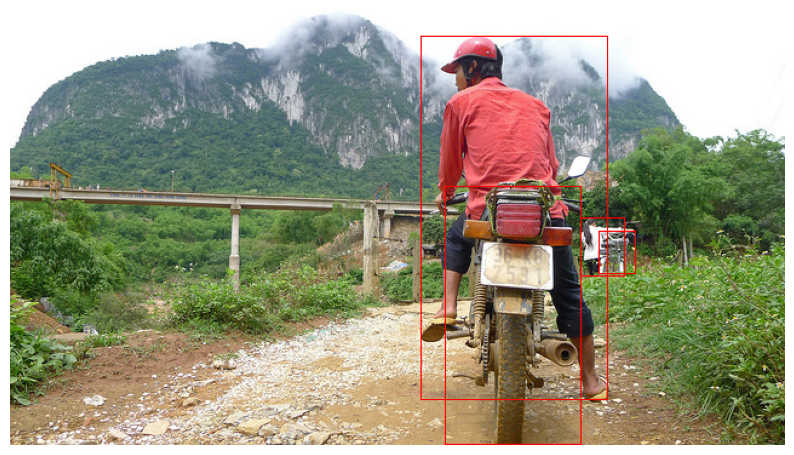

In [18]:
# 데이터셋 경로 설정
image_dir = './train2017/'
annotation_file = 'C:/Users/JOOYONKJ/Desktop/AI/side project/annotations/instances_train2017.json'

# 데이터 로딩
image_dict, bbox_dict = load_coco_data(image_dir, annotation_file)

# 첫 번째 이미지 시각화를 위한 키 가져오기
first_image_id = next(iter(image_dict))

# 시각화
visualize_image_bbox(os.path.join(image_dir, image_dict[first_image_id]), bbox_dict[first_image_id])


In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 정규화
])


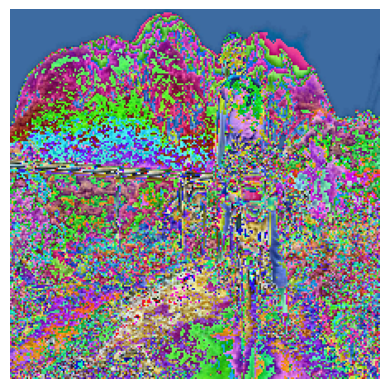

In [20]:
from torchvision.transforms.functional import to_pil_image

def load_transform_image(image_path, transform=None):
    image = Image.open(image_path).convert("RGB")
    if transform is not None:
        image = transform(image)
    return to_pil_image(image)

# 변환된 이미지 로딩 및 시각화
transformed_image = load_transform_image(os.path.join(image_dir, image_dict[first_image_id]), transform)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()
